<a href="https://colab.research.google.com/github/nwayt001/CMSC-478-Machine-Learning/blob/main/code/ML_algorithms_binary_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Algorithm comparison on simple two-class dataset

This notebook uses the two-class, two-feature dataset located in '/CMSC-478-Machine-Learning/data/Classification/toy_2class/'

## Step 1: Load and visualize the data

In [1]:
# prompt: load train.txt  and test.txt data. Convert to numpy array
import numpy as np

# Assuming train.txt and test.txt are in the current directory
train_data = np.loadtxt('train.txt')
test_data = np.loadtxt('test.txt')

# print size
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (400, 3)
Test data shape: (400, 3)


### Plot the training and test datasets

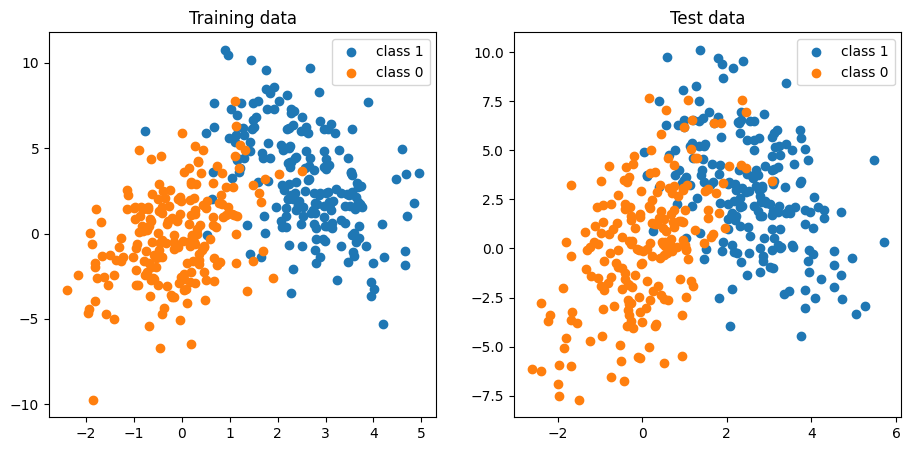

In [2]:
import matplotlib.pyplot as plt

#Plot the training and test sets
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
# Make plot for training data
c1_train_data = train_data[train_data[:,2] == 1]
c0_train_data = train_data[train_data[:,2] == 0]
plt.scatter(c1_train_data[:,0], c1_train_data[:,1], label='class 1')
plt.scatter(c0_train_data[:,0], c0_train_data[:,1], label='class 0')
plt.title("Training data")
plt.legend()

# Make plot for test data
plt.subplot(1,2,2)
c1_test_data = test_data[test_data[:,2] == 1]
c0_test_data = test_data[test_data[:,2] == 0]
plt.scatter(c1_test_data[:,0], c1_test_data[:,1], label='class 1')
plt.scatter(c0_test_data[:,0], c0_test_data[:,1], label='class 0')
plt.title("Test data")
plt.legend()
plt.show()

## Feature Mapping
Looking at the data, it appears that it is not linearly seperable. To fix this, lets perform polynomial feature expansion design a new feature space based on a second order polynomial of the original features to make a quadratic decision boundry.

Our new feature space will go from $ℜ^2$ -> $ℜ^5$

Original features: $[x_1, x_2]$  
New features $[x_1, x_2, x_1^2, x_2^2, x_1*x_2]$

In [17]:
#generate quadradic features
train_data_new = np.zeros((train_data.shape[0], 5))
test_data_new = np.zeros((test_data.shape[0], 5))

train_data_new[:,0] = train_data[:,0]
train_data_new[:,1] = train_data[:,1]
train_data_new[:,2] = train_data[:,0]**2
train_data_new[:,3] = train_data[:,1]**2
train_data_new[:,4] = train_data[:,0]*train_data[:,1]

test_data_new[:,0] = test_data[:,0]
test_data_new[:,1] = test_data[:,1]
test_data_new[:,2] = test_data[:,0]**2
test_data_new[:,3] = test_data[:,1]**2
test_data_new[:,4] = test_data[:,0]*test_data[:,1]

## Gausian Discriminant Analysis (GDA)

The GDA (also known as Bayes classifier) is a generative classifier that will model the conditional probability $p(x|y)$ as a multivariate normal distribution and prior $p(y)$ as a bournulli distribution and then utilize bayes theorem derive the posterior distribution on $y$ given $x$:

<center>
$$
p(y|x) = \frac{p(x|y)p(y)}{p(x)}
$$
</center>

where predictions are made as:
<center>
$argmax_y p(y|x) = argmax_y P(x|y)p(y)$
</center>

### GDA distributions:
we will model the data using these distributions


$$
\begin{align*}
p(y) &= \phi^y(1 - \phi)^{1-y} \\
p(x|y = 0) &= \frac{1}{(2\pi)^{d/2}|Σ|^{1/2}}\exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)) \\
p(x|y = 1) &= \frac{1}{(2\pi)^{d/2}|Σ|^{1/2}}\exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))
\end{align*}
$$

The maximum likelihood estimates of the parameters $\phi$, $\mu_0$, $\mu_1$, and $\Sigma$ are computed by calculating the mean and covariance of the data,



In [3]:
# compute the parameters of the GDA model (phi, mu1, mu0 and sigma) for the training data

phi = train_data[:,2].sum() / train_data.shape[0]
print("phi:", phi)

mu1 = train_data[train_data[:,2] == 1].mean(axis=0)[:2]
print("mu1:", mu1)

mu0 = train_data[train_data[:,2] == 0].mean(axis=0)[:2]
print("mu0:", mu0)

sigma = np.cov(train_data[:,:2].T)
print("sigma:", sigma)

phi: 0.5
mu1: [2.58011201 3.10664562]
mu0: [-0.14452496 -0.10750634]
sigma: [[ 2.75350231  1.95447083]
 [ 1.95447083 10.85417475]]


In [4]:
# Make predictions on the test data using the GDA model
predictions = np.zeros(test_data.shape[0])

for i in range(test_data.shape[0]):
    x = test_data[i,:2]
    y = test_data[i,2]

    # compute p(x|y = 0) and p(x|y = 1)
    p0 = (1/((2*np.pi)**(x.shape[0]/2)*np.linalg.det(sigma)**0.5))*np.exp(-0.5*(x-mu0).T@np.linalg.inv(sigma)@(x-mu0))
    p1 = (1/((2*np.pi)**(x.shape[0]/2)*np.linalg.det(sigma)**0.5))*np.exp(-0.5*(x-mu1).T@np.linalg.inv(sigma)@(x-mu1))

    # select max as the predicted class p(y|x) = p(x|y)*(py)
    if p0*phi > p1*(1-phi):
        predictions[i] = 0
    else:
        predictions[i] = 1

# compute the test accuracy
GDA_test_accuracy = np.mean(predictions == test_data[:,2])
print("Test accuracy:", GDA_test_accuracy)

Test accuracy: 0.9025


In [5]:
# Make predictions on the train data using the GDA model
predictions = np.zeros(train_data.shape[0])

for i in range(train_data.shape[0]):
    x = train_data[i,:2]
    y = train_data[i,2]

    # compute p(x|y = 0) and p(x|y = 1)
    p0 = (1/((2*np.pi)**(x.shape[0]/2)*np.linalg.det(sigma)**0.5))*np.exp(-0.5*(x-mu0).T@np.linalg.inv(sigma)@(x-mu0))
    p1 = (1/((2*np.pi)**(x.shape[0]/2)*np.linalg.det(sigma)**0.5))*np.exp(-0.5*(x-mu1).T@np.linalg.inv(sigma)@(x-mu1))

    # select max as the predicted class p(y|x) = p(x|y)*(py)
    if p0*phi > p1*(1-phi):
        predictions[i] = 0
    else:
        predictions[i] = 1

# compute the test accuracy
GDA_train_accuracy = np.mean(predictions == test_data[:,2])
print("Train accuracy:", GDA_train_accuracy)

Train accuracy: 0.9425


### GDA using quadradic features

Next, lets build the GDA model using the quadratic feature set. Everything will be the same as before, but we'll use the new mapped features.

In [20]:
# compute the parameters of the GDA model (phi, mu1, mu0 and sigma) for the new training data

phi = train_data[:,2].sum() / train_data.shape[0]
print("phi:", phi)

# new quadradic features
mu1_new = train_data_new[train_data[:,2] == 1].mean(axis=0)
print("mu1:", mu1_new)

mu0_new = train_data_new[train_data[:,2] == 0].mean(axis=0)
print("mu0:", mu0_new)

sigma_new = np.cov(train_data_new.T)
print("sigma:", sigma_new)

# train GDA model using the quadradic features
# Make predictions on the test data using the GDA model
predictions = np.zeros(test_data.shape[0])

for i in range(test_data.shape[0]):
    x = test_data_new[i,:]
    y = test_data[i,2]

    # compute p(x|y = 0) and p(x|y = 1)
    p0 = (1/((2*np.pi)**(x.shape[0]/2)*np.linalg.det(sigma_new)**0.5))*np.exp(-0.5*(x-mu0_new).T@np.linalg.inv(sigma_new)@(x-mu0_new))
    p1 = (1/((2*np.pi)**(x.shape[0]/2)*np.linalg.det(sigma_new)**0.5))*np.exp(-0.5*(x-mu1_new).T@np.linalg.inv(sigma_new)@(x-mu1_new))

    # select max as the predicted class p(y|x) = p(x|y)*(py)
    if p0*phi > p1*(1-phi):
        predictions[i] = 0
    else:
        predictions[i] = 1

# compute the test accuracy
GDA_quadratic_test_accuracy = np.mean(predictions == test_data[:,2])
print("Test accuracy:", GDA_quadratic_test_accuracy)

phi: 0.5
mu1: [ 2.58011201  3.10664562  7.62281387 18.88904676  6.59645898]
mu0: [-0.14452496 -0.10750634  0.83646536  7.26245005  0.95504272]
sigma: [[  2.75350231   1.95447083   6.97130264   3.2763534    3.46791071]
 [  1.95447083  10.85417475   1.71898418  37.68495791  13.56363197]
 [  6.97130264   1.71898418  25.46842481  -2.01282191   8.26234342]
 [  3.2763534   37.68495791  -2.01282191 354.82545815  74.53615455]
 [  3.46791071  13.56363197   8.26234342  74.53615455  39.1394678 ]]
Test accuracy: 0.885


## Naive Bayes Classifier

The Naive Bayes classifier is also a generative algorithm that is very similar to GDA with one exception: the Naive Bayes assumption -- to model $p(x|y)$, we assume that the $x's$ are conditionally independent given $y$. The resulting algorithm is the Naive Bayes Classifier.

### Naive Bayes Assuption:

$$
\begin{align*}
p(x_1,x_2,...|y) &= p(x_1|y)p(x_2|y,x_1)p(x_3|y,x_1,x_2)...\\
&=p(x_1|y)p(x_2|yp(x_3|y)...\\
&=∏_{j=1}^dp(x_j|y)
\end{align*}
$$

Because of this assumption, the Naive Bayes classifier can work well on cases where you have thousands or millions of features, i.e. when $x$ is high dimensional.


Naive Bayes can be used with both continuous and discrete features. For discrete features, the probabiliteis are modeled using a multinomial or bernoulli distribution. An example would be email classification.

For continuous features, as is in this dataset, each $x_i$ can be modeled as a univariate gausian:

$$
\begin{align*}
p(x_i|y) = Ν(x_i|\mu_{iy},σ_{iy}^2)
\end{align*}
$$

The class conditional probabily distributions are therefore:

$$
\begin{align*}
p(x_i|y = 0) &= \frac{1}{\sqrt{2\piσ_0^2}}\exp^{-\frac{(x-\mu_0)^2}{2σ_0^2}} \\
p(x_i|y = 1) &= \frac{1}{\sqrt{2\piσ_1^2}}\exp^{-\frac{(x-\mu_1)^2}{2σ_1^2}}
\end{align*}
$$





In [21]:
# compute the parameters of the Naive Bayes model (phi, mu1, mu0 and var1 and var0) for the training data

phi = train_data[:,2].sum() / train_data.shape[0]
print("phi:", phi)

mu1 = train_data[train_data[:,2] == 1].mean(axis=0)[:2]
print("mu1:", mu1)

mu0 = train_data[train_data[:,2] == 0].mean(axis=0)[:2]
print("mu0:", mu0)

var0 = np.var(train_data[train_data[:,2] == 0, :2], axis=0)
print("var0:", var0)

var1 = np.var(train_data[train_data[:,2] == 1, :2], axis=0)
print("var1:", var1)

phi: 0.5
mu1: [2.58011201 3.10664562]
mu0: [-0.14452496 -0.10750634]
var0: [0.8155779  7.25089244]
var1: [0.96583588 9.23779975]


In [22]:
# make predictions for the NB classifier
predictions = np.zeros(test_data.shape[0])

num_features = 2

for i in range(test_data.shape[0]):
    x = test_data[i,:2]
    y = test_data[i,2]

    p0 = p1 = 1
    # compute p(x|y = 0) and p(x|y = 1)
    for j in range(num_features):
      p0 *= (1/((2*np.pi*var0[j])**(1/2)))*np.exp(-((x[j]-mu0[j])**2)/(2*var0[j]))
      p1 *= (1/((2*np.pi*var1[j])**(1/2)))*np.exp(-((x[j]-mu1[j])**2)/(2*var1[j]))

    # select max as the predicted class p(y|x) = p(x|y)*(py)
    if p0*phi > p1*(1-phi):
        predictions[i] = 0
    else:
        predictions[i] = 1

# compute the test accuracy
NB_test_accuracy = np.mean(predictions == test_data[:,2])
print("Naive Bayes Test accuracy:", NB_test_accuracy)

Naive Bayes Test accuracy: 0.9075


### NB using quadradic features

Next, lets build the NB model using the quadratic feature set. Everything will be the same as before, but we'll use the new mapped features.

In [24]:
# compute the parameters of the Naive Bayes model (phi, mu1, mu0 and var1 and var0) for the training data with quadratic features
phi = train_data[:,2].sum() / train_data.shape[0]
print("phi:", phi)

mu1_new = train_data_new[train_data[:,2] == 1].mean(axis=0)
print("mu1:", mu1_new)

mu0_new = train_data_new[train_data[:,2] == 0].mean(axis=0)
print("mu0:", mu0_new)

var0_new = np.var(train_data_new[train_data[:,2] == 0, :], axis=0)
print("var0:", var0_new)

var1_new = np.var(train_data_new[train_data[:,2] == 1, :], axis=0)
print("var1:", var1_new)

# make predictions for the NB classifier
predictions = np.zeros(test_data.shape[0])

num_features = 2

for i in range(test_data.shape[0]):
    x = test_data_new[i,:]
    y = test_data[i,2]

    p0 = p1 = 1
    # compute p(x|y = 0) and p(x|y = 1)
    for j in range(num_features):
      p0 *= (1/((2*np.pi*var0_new[j])**(1/2)))*np.exp(-((x[j]-mu0_new[j])**2)/(2*var0_new[j]))
      p1 *= (1/((2*np.pi*var1_new[j])**(1/2)))*np.exp(-((x[j]-mu1_new[j])**2)/(2*var1_new[j]))

    # select max as the predicted class p(y|x) = p(x|y)*(py)
    if p0*phi > p1*(1-phi):
        predictions[i] = 0
    else:
        predictions[i] = 1

# compute the test accuracy
NB_quadratic_test_accuracy = np.mean(predictions == test_data[:,2])
print("Naive Bayes Test accuracy:", NB_quadratic_test_accuracy)

phi: 0.5
mu1: [ 2.58011201  3.10664562  7.62281387 18.88904676  6.59645898]
mu0: [-0.14452496 -0.10750634  0.83646536  7.26245005  0.95504272]
var0: [  0.8155779    7.25089244   1.30167641 120.95106367   7.17707715]
var1: [  0.96583588   9.23779975  26.48056809 519.33684976  54.99337243]
Naive Bayes Test accuracy: 0.9075


## K-Nearest Neighbor Classifier

The K-Nearest Neighbor Classifier (KNN) is a relatively simple non-parametric classifier that essentially will classify new a new test sample to the class belonging to the nearest neihbors of the test sample.

The KNN classifier centers a hyper-sphere around the test sample and grows that sphere until K training samples lie within that sphere (i.e. taking the k closes samples in euclidian space). Next, the samples are counted up according to class and the test sample is assigned the class with the majority label.



In [32]:
# KNN classifier with differnt K values (k = 3, k = 7 and k = 9)

k_values = [3, 7, 9]

# pre-compute the euclidian distance between each Test sample with all of the training samples
E_dist = np.zeros((test_data.shape[0], train_data.shape[0]))

for i in range(test_data.shape[0]):
    for j in range(train_data.shape[0]):
        E_dist[i,j] = np.linalg.norm(test_data[i,:2] - train_data[j,:2])

# sort the columns in asending order and get back the indexes to arrange the labels
sorted_training_samples = np.argsort(E_dist, axis=1)
E_dist = np.sort(E_dist, axis=1)

# iterate over each k_value
KNN_Test_accuracy = np.zeros(len(k_values))
cnt = 0
for k in k_values:
  # loop over each test sample (row in the E_dist matrix)
  predictions = np.zeros(test_data.shape[0])
  for i in range(E_dist.shape[0]):
    # get the k nearest neighbors
    k_nearest_neighbors = sorted_training_samples[i,:k]
    # get the labels of the k nearest neighbors
    k_nearest_neighbors_labels = train_data[k_nearest_neighbors,2]
    # get the majority label
    majority_label = np.bincount(k_nearest_neighbors_labels.astype(int)).argmax()
    # assign the majority label to the test sample
    predictions[i] = majority_label

  # compute the test accuracy
  KNN_Test_accuracy[cnt] = np.mean(predictions == test_data[:,2])
  print("KNN Test accuracy for k = {}: {}".format(k, KNN_Test_accuracy[cnt]))
  cnt += 1


KNN Test accuracy for k = 3: 0.8875
KNN Test accuracy for k = 7: 0.895
KNN Test accuracy for k = 9: 0.89


### KNN with quadratic features

Let's repeat the KNN classifier with quadratic features

In [37]:
# KNN classifier with differnt K values (k = 3, k = 7 and k = 9) using quadratic features

k_values = [3, 7, 9]

# pre-compute the euclidian distance between each Test sample with all of the training samples
E_dist = np.zeros((test_data_new.shape[0], train_data_new.shape[0]))

for i in range(test_data_new.shape[0]):
    for j in range(train_data_new.shape[0]):
        E_dist[i,j] = np.linalg.norm(test_data_new[i,:] - train_data_new[j,:])

# sort the columns in asending order and get back the indexes to arrange the labels
sorted_training_samples = np.argsort(E_dist, axis=1)
E_dist = np.sort(E_dist, axis=1)

# iterate over each k_value
KNN_quadratic_Test_accuracy = np.zeros(len(k_values))
cnt = 0
for k in k_values:
  # loop over each test sample (row in the E_dist matrix)
  predictions = np.zeros(test_data.shape[0])
  for i in range(E_dist.shape[0]):
    # get the k nearest neighbors
    k_nearest_neighbors = sorted_training_samples[i,:k]
    # get the labels of the k nearest neighbors
    k_nearest_neighbors_labels = train_data[k_nearest_neighbors,2]
    # get the majority label
    majority_label = np.bincount(k_nearest_neighbors_labels.astype(int)).argmax()
    # assign the majority label to the test sample
    predictions[i] = majority_label

  # compute the test accuracy
  KNN_quadratic_Test_accuracy[cnt] = np.mean(predictions == test_data[:,2])
  print("Quadratic KNN Test accuracy for k = {}: {}".format(k, KNN_quadratic_Test_accuracy[cnt]))
  cnt += 1


Quadratic KNN Test accuracy for k = 3: 0.87
Quadratic KNN Test accuracy for k = 7: 0.865
Quadratic KNN Test accuracy for k = 9: 0.8625


# Logistic Regresion Classifier

A logistic regression classifier is a lot like linear regression, except instead of predicting $y$ as a continuous valued variable, it will be used to predict discrete labels of $y ∈\{0, 1\}$. To do this, we'll make a modification of the Hypothesis function, $h_θ(x)$ to bound the output of $y$ to be between $0$ and $1$.

Recall in linear regression:
$$ h_θ(x) = \sum_{i=0}^d θ_ix_i = θ^Tx
$$

For Logisitic regression, we'll use the sigmoid or logistic function:
$g(z) = \frac{1}{1+e^-z}$

$$ h_θ(x) = g(θ^Tx) =  \frac{1}{1+e^-θ^Tx}
$$


Now let's define the conditional probabilities with respect to this hypothesis.
Let's assume that:

$$
\begin{align*}
P(y=1|x;θ) &= h_θ(x) \\
P(y=0|x;θ) &= (1 - h_θ(x)
\end{align*}
$$
which can be expressed as:
$$ p(y|x;θ) = h_θ(x)^y(1-h_θ(x))^{1-y}$$

Assuming the data is independent, we can write down the likelihood of the parameters as:

$$
\begin{align*}
L(θ) &= p(Y|X;θ) \\
&= ∏_{i=0}^np(y^i|x^i;θ)\\
&= ∏_{i=0}^nh_θ(x^i)^{y^i}(1-h_θ(x^i))^{1-y^i}
\end{align*}
$$

We want to maximize the likelihood to get the maximum likelihood estimate (MLE), however, maximizing the log of a function will give us the same as maximizing the function, except it makes the derivative calculations easier so we take the log.

$$
ℓ(θ) = log (L(θ)) = ∑_{i=1}^{n} y^ilog(h(x^i) + (1-y^i)log(1-h(x^i))
$$

In order to find the parameters that maximize this liklihood function, we need to find the derivative of $ℓ(θ) with respect to $θ and then take steps along that direction in order to maximize (i.e. gradient ascent).

$$
θ = \theta + α \nabla_θ\ell(θ)
$$

Where the gradient of $ℓ(θ)$ with respect to $\theta$ is:
$$
∇_\thetaℓ(θ) = (y - h_θ(x))x
$$
and our stochastic update rule is therefore:
$$
\begin{align*}
θ &= θ + α(y - h_θ(x^i))(x^i) \\
θ &= θ + α(y - \frac{1}{1+e^{-θ^Tx^i}})(x^i)
\end{align*}
$$


In [57]:
# logistic regression with stochastic gradient decent

# initialize parameters
theta = np.zeros(train_data.shape[1]-1)
alpha = 0.001

## Train Logistic regression model
num_epochs = 25
for epoch in range(num_epochs):

  # loop over each training sample
  for i in range(train_data.shape[0]):
      # get the current training sample
      x = train_data[i,:2]
      y = train_data[i,2]

      # compute the hypothesis
      h = 1/(1+np.exp(-np.dot(theta,x)))

      # update the parameters
      theta += alpha*(y-h)*x

  ## Test model (batched prediction)
  predictions = np.zeros(test_data.shape[0])

  # get x test
  x = test_data[:,:2]

  # make predicitons
  y_pred = 1/(1+np.exp(-np.dot(theta,x.T)))

  # apply thresholding
  predictions[y_pred >= 0.5] = 1
  predictions[y_pred < 0.5] = 0

  # compute the test accuracy
  LR_test_accuracy = np.mean(predictions == test_data[:,2])
  print("Logistic Regression Test epoch {} accuracy {}:".format(epoch, LR_test_accuracy))



Logistic Regression Test epoch 0 accuracy 0.7225:
Logistic Regression Test epoch 1 accuracy 0.735:
Logistic Regression Test epoch 2 accuracy 0.7325:
Logistic Regression Test epoch 3 accuracy 0.74:
Logistic Regression Test epoch 4 accuracy 0.74:
Logistic Regression Test epoch 5 accuracy 0.7425:
Logistic Regression Test epoch 6 accuracy 0.745:
Logistic Regression Test epoch 7 accuracy 0.7425:
Logistic Regression Test epoch 8 accuracy 0.74:
Logistic Regression Test epoch 9 accuracy 0.74:
Logistic Regression Test epoch 10 accuracy 0.74:
Logistic Regression Test epoch 11 accuracy 0.7375:
Logistic Regression Test epoch 12 accuracy 0.74:
Logistic Regression Test epoch 13 accuracy 0.74:
Logistic Regression Test epoch 14 accuracy 0.745:
Logistic Regression Test epoch 15 accuracy 0.745:
Logistic Regression Test epoch 16 accuracy 0.745:
Logistic Regression Test epoch 17 accuracy 0.745:
Logistic Regression Test epoch 18 accuracy 0.7475:
Logistic Regression Test epoch 19 accuracy 0.7475:
Logistic R

#The Perception Classifier

# Algorithm Comparison:

In [58]:
#Tabulate the accuracies

from tabulate import tabulate
table = [["GDA", GDA_test_accuracy], ["GDA quadratic features", GDA_quadratic_test_accuracy], ["NB", NB_test_accuracy], ["NB quadratic features", NB_quadratic_test_accuracy], ["KNN", KNN_Test_accuracy[0]], ["KNN quadratic features", KNN_quadratic_Test_accuracy[0]], ["Logistic Regression", LR_test_accuracy]]
print(tabulate(table, headers=["Classifier", "Test Accuracy"]))

Classifier                Test Accuracy
----------------------  ---------------
GDA                              0.9025
GDA quadratic features           0.885
NB                               0.9075
NB quadratic features            0.9075
KNN                              0.8875
KNN quadratic features           0.87
Logistic Regression              0.7475
